# Fisheye to Plane

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.color import rgb2gray
from PIL import Image

Check

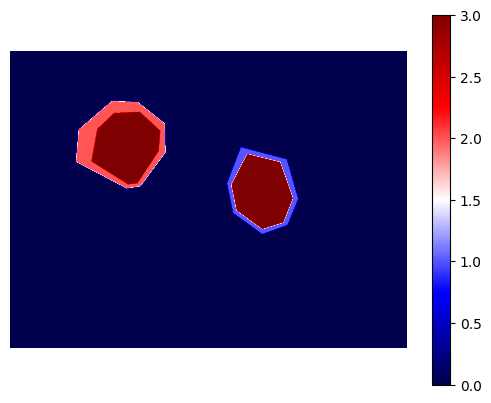

In [2]:
# Define the path to the image
img_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0034_FV.png'




# Load the image
image = Image.open(img_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Plot the image
plt.imshow(image_array, cmap='seismic')
plt.axis('off')  # Turn off axis numbers and ticks
plt.colorbar()
plt.show()


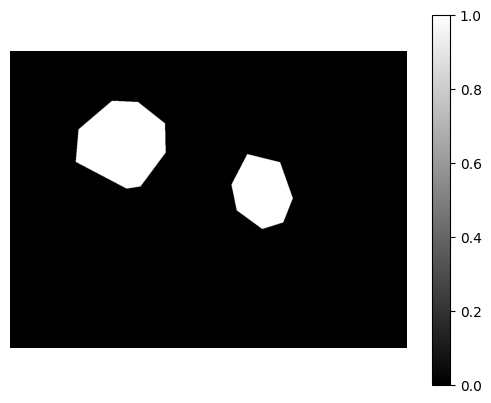

'\n0 --> Clear\n1 --> Soiled\n'

In [3]:
# Create the binary mask
# All values greater than 1 become 1, values equal to 1 become 0
binary_mask = np.where(image_array > 1, 1, 0)

# Plot the binary mask
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.colorbar()
plt.show()

"""
0 --> Clear
1 --> Soiled
"""

### 1. Create binary masks

In [5]:
import os
import numpy as np
from PIL import Image

def process_image(image_path):
    # Load the image
    image = Image.open(image_path)

    # Convert the image to a numpy array
    image_array = np.array(image)

    # Create the binary mask
    binary_mask = np.where(image_array > 1, 1, 0)

    # Convert the binary mask back to an image (uint8 format)
    binary_image = Image.fromarray((binary_mask * 255).astype(np.uint8))

    # Save the binary image, replacing the original image
    binary_image.save(image_path)
    print(f"Processed and replaced: {image_path}")

def process_images_in_directory(input_directory):
    # Iterate over all files in the directory
    for filename in os.listdir(input_directory):
        if filename.endswith(".png"):  # Adjust for other image formats if needed
            image_path = os.path.join(input_directory, filename)
            process_image(image_path)

# Process all images in the specified directories, replacing the original files
process_images_in_directory('/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet')

process_images_in_directory('/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/gt_droplet')


Processed and replaced: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/1097_FV.png
Processed and replaced: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0034_FV.png
Processed and replaced: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0991_MVR.png
Processed and replaced: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0796_MVL.png
Processed and replaced: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0798_MVR.png
Processed and replaced: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0604_RV.png
Processed and replaced: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0600_MVR.png
Processed and replaced: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0687_MVR

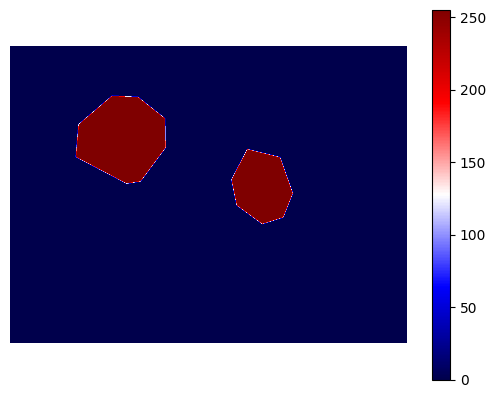

In [7]:
# Define the path to the image
img_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0034_FV.png'




# Load the image
image = Image.open(img_path)

# Convert the image to a numpy array
image_array = np.array(image)

#image_array = image_array/255

# Plot the image
plt.imshow(image_array, cmap='seismic')
plt.axis('off')  # Turn off axis numbers and ticks
plt.colorbar()
plt.show()


### 2. Defisheye

In [8]:
import os
from defisheye import Defisheye
import cv2

# Definiere die Parameter für Defisheye
dtype = 'linear'
format = 'fullframe'
fov = 190
pfov = 140  # 120


# DONE

def fisheye_transform(main_dir):
    # Durchlaufe alle Unterverzeichnisse und -dateien
    for root, dirs, files in os.walk(main_dir):
        for file in files:
            if file.endswith(".png"):
                img_path = os.path.join(root, file)
                
                # Defisheye-Objekt erstellen und Bild konvertieren
                obj = Defisheye(img_path, dtype=dtype, format=format, fov=fov, pfov=pfov)
                converted_img = obj.convert()
                
                # Bild speichern (überschreibt das Originalbild)
                cv2.imwrite(img_path, converted_img)
                
                print(f"Converted: {img_path}")

    print("All images have been converted.")


# Test
fisheye_transform("/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet")
fisheye_transform("/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/rgb_droplet")


# Train
fisheye_transform("/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/gt_droplet")
fisheye_transform("/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/rgb_droplet")



Converted: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/1097_FV.png
Converted: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0034_FV.png
Converted: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0991_MVR.png
Converted: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0796_MVL.png
Converted: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0798_MVR.png
Converted: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0604_RV.png
Converted: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0600_MVR.png
Converted: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0687_MVR.png
Converted: /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet

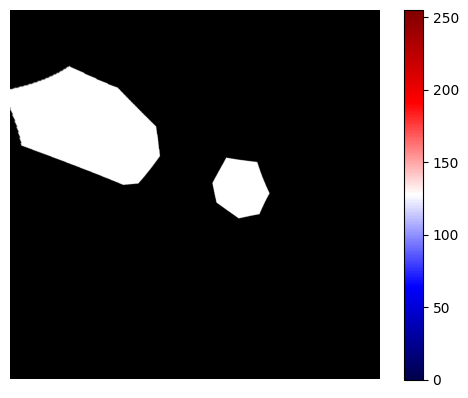

In [9]:
# Define the path to the image
img_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0034_FV.png'


# Load the image
image = Image.open(img_path)

# Convert the image to a numpy array
image_array = np.array(image)

#image_array = image_array/255

# Plot the image
plt.imshow(image_array, cmap='seismic')
plt.axis('off')  # Turn off axis numbers and ticks
plt.colorbar()
plt.show()


### 3. Blurr

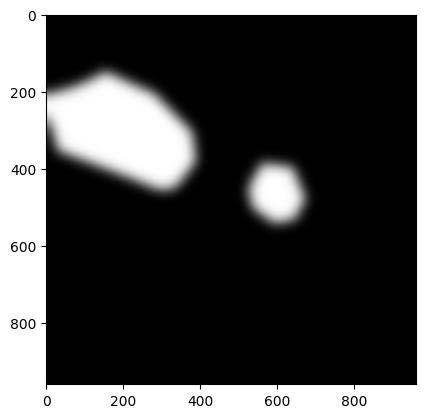

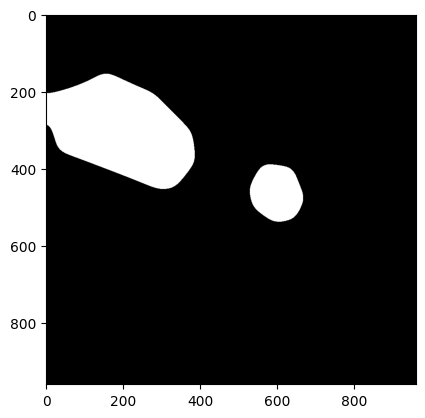

In [10]:
# Define the path to the image
img_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0034_FV.png'




# Load the image
image = Image.open(img_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Gaussian Blur anwenden
smoothed_img = cv2.GaussianBlur(image_array, (101, 101), 0)


plt.imshow(smoothed_img)
plt.show()

# Schwellenwert anwenden, um binäre Werte zu erhalten
_, finish_img = cv2.threshold(smoothed_img, 127, 255, cv2.THRESH_BINARY)


plt.imshow(finish_img)
plt.show()

### Invertiere Bilder

In [17]:

def invert_masks_in_directory(mask_directory):
    """
    Inverts all binary mask images (PNG files) in the given directory and replaces them.
    
    Args:
        mask_directory (str): Path to the directory containing the binary mask images.
    """
    # Loop through all files in the directory and process PNG images
    for filename in os.listdir(mask_directory):
        if filename.endswith(".png"):
            file_path = os.path.join(mask_directory, filename)
            
            # Open the image
            img = Image.open(file_path).convert('L')  # Convert to grayscale ('L')
            
            # Convert the image to a NumPy array for easier manipulation
            img_array = np.array(img)
            
            # Invert the mask: assuming the mask is binary (0 and 255)
            inverted_array = 255 - img_array
            
            # Convert the NumPy array back to an image
            inverted_img = Image.fromarray(inverted_array)
            
            # Save the inverted mask, replacing the original image
            inverted_img.save(file_path)
            print(f"Inverted and saved: {filename}")

    print("All masks in the directory have been inverted.")




# Test
invert_masks_in_directory("/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet")

# Train
invert_masks_in_directory("/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/gt_droplet")




Inverted and saved: 1097_FV.png
Inverted and saved: 0034_FV.png
Inverted and saved: 0991_MVR.png
Inverted and saved: 0796_MVL.png
Inverted and saved: 0798_MVR.png
Inverted and saved: 0604_RV.png
Inverted and saved: 0600_MVR.png
Inverted and saved: 0687_MVR.png
Inverted and saved: 0411_MVR.png
Inverted and saved: 0582_FV.png
Inverted and saved: 2332_MVR.png
Inverted and saved: 0802_MVR.png
Inverted and saved: 0978_FV.png
Inverted and saved: 0052_MVR.png
Inverted and saved: 0769_RV.png
Inverted and saved: 0338_MVL.png
Inverted and saved: 0976_FV.png
Inverted and saved: 2318_FV.png
Inverted and saved: 0982_MVL.png
Inverted and saved: 0421_RV.png
Inverted and saved: 0352_MVR.png
Inverted and saved: 1004_RV.png
Inverted and saved: 0409_MVR.png
Inverted and saved: 1114_RV.png
Inverted and saved: 1113_RV.png
Inverted and saved: 0395_FV.png
Inverted and saved: 1242_MVL.png
Inverted and saved: 2338_RV.png
Inverted and saved: 0605_RV.png
Inverted and saved: 0771_RV.png
Inverted and saved: 0413_M

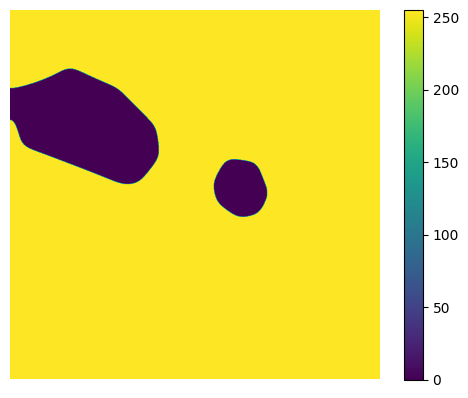

In [30]:
# Define the path to the image
img_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0034_FV.png'


# Load the image
image = Image.open(img_path)

# Convert the image to a numpy array
image_array = np.array(image)

#image_array = image_array/255

# Plot the image
plt.imshow(image_array)
plt.axis('off')  # Turn off axis numbers and ticks
plt.colorbar()
plt.show()


In [ ]:

import os
import cv2
import numpy as np
from PIL import Image

def process_images_in_directory(directory_path, kernel_size=(101, 101), threshold_value=127):
    """
    This function applies Gaussian blur and thresholding to all images in the given directory.
    It will replace the original images with the processed images.
    
    Args:
    - directory_path (str): Path to the directory containing the images.
    - kernel_size (tuple): Kernel size for Gaussian blur (should be odd values, e.g., (101, 101)).
    - threshold_value (int): Threshold value for binarization (default is 127).
    
    Returns:
    None: The function will process and replace the images in the given directory.
    """
    
    # Loop through all files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            # Construct the full path to the image file
            img_path = os.path.join(directory_path, filename)

            # Load the image
            image = Image.open(img_path)
            
            # Convert the image to a numpy array
            image_array = np.array(image)
            

            # Apply Gaussian Blur
            smoothed_img = cv2.GaussianBlur(image_array, kernel_size, 0)

            # Apply threshold to get binary image
            _, finish_img = cv2.threshold(smoothed_img, threshold_value, 255, cv2.THRESH_BINARY)

            # Convert the resulting numpy array back to an image
            finish_image = Image.fromarray(finish_img)

            # Save the processed image, replacing the original
            finish_image.save(img_path)

    print(f"Processing complete! All images in {directory_path} have been processed and replaced.")




# Test
process_images_in_directory("/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet")

# Train
process_images_in_directory("/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/gt_droplet")



In [ ]:
def binarize_masks(mask_directory):
    """
    Binarizes all binary mask images (PNG files) in the given directory, converting them to 0s and 1s,
    and replaces the original images with binary values in 0 and 1.
    
    Args:
        mask_directory (str): Path to the directory containing the binary mask images.
    """
    # Loop through all files in the directory and process PNG images
    for filename in os.listdir(mask_directory):
        if filename.endswith(".png"):
            file_path = os.path.join(mask_directory, filename)
            
            # Open the image
            img = Image.open(file_path).convert('L')  # Convert to grayscale ('L')
            
            # Convert the image to a NumPy array for easier manipulation
            img_array = np.array(img)
            
            # Binarize the mask: convert all non-zero values to 1
            binarized_array = np.where(img_array > 0, 1, 0)  # Now binarized 0 or 1 internally
            
            # Save the binarized mask as a NumPy array to maintain 0/1 values
            np.save(file_path.replace(".png", ".npy"), binarized_array)
            print(f"Binarized and saved as .npy: {filename}")

    print("All masks in the directory have been binarized and saved as .npy files.")


# Example of how to call the function
# Test
binarize_masks("/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet")

# Train
binarize_masks("/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/gt_droplet")



In [ ]:
# Define the path to the image
img_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0034_FV.png'


# Load the image
image = Image.open(img_path)

# Convert the image to a numpy array
image_array = np.array(image)

#image_array = image_array/255

# Plot the image
plt.imshow(image_array)
plt.axis('off')  # Turn off axis numbers and ticks
plt.colorbar()
plt.show()


### 4. Approximation

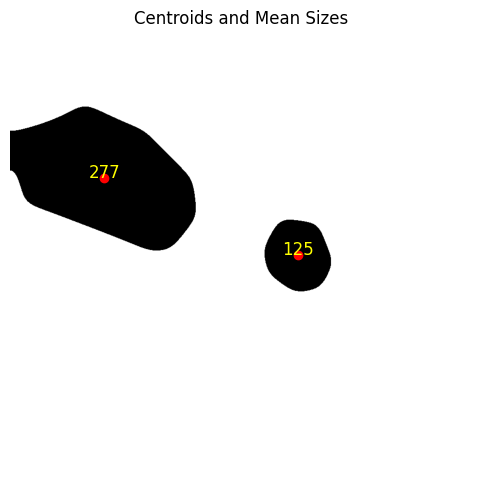

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input binary mask
img_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet/0034_FV.png'

# Load the binary mask image
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Invert the image to detect the black regions as foreground
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours of the black regions
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroids and sizes for each region
regions_info = []
for contour in contours:
    # Calculate the moments to find the centroid
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0
    
    # Calculate the area (mean size)
    area = cv2.contourArea(contour)
    
    regions_info.append({
        'centroid_x': cx,
        'centroid_y': cy,
        'mean_size': int(np.sqrt(area))  # Use sqrt(area) for approximate size
    })

# Plot the binary mask with centroids and mean sizes
plt.figure(figsize=(6, 6))

# Show the original binary mask
plt.imshow(image, cmap='gray')

# Plot centroids and mean sizes
for region in regions_info:
    cx, cy, size = region['centroid_x'], region['centroid_y'], region['mean_size']
    plt.scatter(cx, cy, color='red')  # Plot the centroid
    plt.text(cx, cy, f'{size}', color='yellow', fontsize=12, ha='center')  # Annotate with size

# Display title and remove axes
plt.title('Centroids and Mean Sizes')
plt.axis('off')
plt.show()


In [34]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define input and output directories
input_dir = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet'
output_dir = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/test_results_droplets'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all PNG files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):
        # Load each binary mask image
        input_image_path = os.path.join(input_dir, filename)
        image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

        # Invert the image to detect the black regions as foreground
        _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

        # Find contours of the black regions
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate centroids and sizes for each region
        regions_info = []
        for contour in contours:
            # Calculate the moments to find the centroid
            M = cv2.moments(contour)
            if M['m00'] != 0:
                cx = int(M['m10'] / M['m00'])
                cy = int(M['m01'] / M['m00'])
            else:
                cx, cy = 0, 0
            
            # Calculate the area (mean size)
            area = cv2.contourArea(contour)
            mean_size = int(np.sqrt(area))  // 2 # Use sqrt(area) for approximate size

            #x, y, w, h = cv2.boundingRect(contour)
            #mean_size = int((w + h) / 2)
                        
            regions_info.append({
                'centroid_x': cx,
                'centroid_y': cy,
                'mean_size': mean_size
            })

        # Create a color version of the image to draw on
        color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

        # Draw centroids, mean sizes, and circles on the image
        for region in regions_info:
            cx, cy, size = region['centroid_x'], region['centroid_y'], region['mean_size']
            
            # Draw the centroid as a red dot
            cv2.circle(color_image, (cx, cy), 3, (0, 0, 255), -1)  # Red dot
            
            # Draw the circle representing the region size
            cv2.circle(color_image, (cx, cy), size, (255, 0, 0), 2)  # Blue circle
            
            # Put the text for the mean size
            cv2.putText(color_image, f'{size}', (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 1, cv2.LINE_AA)  # Yellow text

        # Save the result to the output directory
        output_image_path = os.path.join(output_dir, f'processed_{filename}')
        cv2.imwrite(output_image_path, color_image)

        # Optionally, display the results (comment this out if running as a batch script)
        #plt.figure(figsize=(6, 6))
        #plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
        #plt.title(f'Processed Image: {filename}')
        #plt.axis('off')
        #plt.show()

print("Processing complete. Results saved in the output directory.")


Processing complete. Results saved in the output directory.


Run

In [36]:
import os
import cv2
import numpy as np
import csv

# Function to calculate x, y, size for each region and save them along with the filename to a CSV file
def calculate_and_save_xy_size_to_csv(input_dir, output_csv_path):
    # Prepare a list to hold the filename, x, y, size data
    inputs = []

    # Iterate through all PNG files in the directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.png'):
            input_image_path = os.path.join(input_dir, filename)
            image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

            # Invert the image to detect black regions as foreground
            _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

            # Find contours of the black regions
            contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Loop over each contour to calculate x, y, size
            for contour in contours:
                # Calculate the moments to find the centroid
                M = cv2.moments(contour)
                if M['m00'] != 0:
                    cx = int(M['m10'] / M['m00'])
                    cy = int(M['m01'] / M['m00'])
                else:
                    cx, cy = 0, 0
                
                # Normalize centroid (x, y) relative to image dimensions
                normalized_x = cx / image.shape[1]
                normalized_y = cy / image.shape[0]

                # Calculate the size as the square root of the area
                area = cv2.contourArea(contour)
                size = int(np.sqrt(area))
                normalized_size = size / max(image.shape)

                # Append the filename, normalized x, y, size to the list
                inputs.append([filename, normalized_x, normalized_y, normalized_size])

    # Write the inputs to a CSV file
    with open(output_csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['image_filename', 'x', 'y', 'size'])  # CSV header

        # Write the filename, x, y, size values for each region
        for row in inputs:
            writer.writerow(row)

    print(f"Saved x, y, size data to {output_csv_path}")



# Example usage for Droplet (Test and Train)
# Test
input_dir = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet'  # Directory with your PNG files
output_csv_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/xy_size_data_test_droplet.csv'  # Path to save the CSV
calculate_and_save_xy_size_to_csv(input_dir, output_csv_path)

# Train
input_dir = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/gt_droplet'  # Directory with your PNG files
output_csv_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/xy_size_data_train_droplet.csv'  # Path to save the CSV
calculate_and_save_xy_size_to_csv(input_dir, output_csv_path)


Saved x, y, size data to /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/xy_size_data_test_droplet.csv
Saved x, y, size data to /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/xy_size_data_train_droplet.csv


Problem: Model is learning other cluster too --> Seperate these

In [2]:
import os
import cv2
import numpy as np
import csv

# Function to calculate x, y, size for each region and save them as separate PNGs
def split_and_save_clusters(input_dir, output_dir, csv_output_path):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    inputs = []  # To store the filename and the x, y, size values

    # Iterate through all PNG files in the directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.png'):
            input_image_path = os.path.join(input_dir, filename)
            image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

            # Invert the image to detect black regions as foreground
            _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

            # Find contours of the black regions
            contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Loop over each contour to calculate x, y, size and save individual clusters as separate PNGs
            for i, contour in enumerate(contours):
                # Create a blank mask for the current contour
                blank_image = np.zeros_like(image)

                # Draw only the current contour on the blank mask
                cv2.drawContours(blank_image, [contour], -1, 255, thickness=cv2.FILLED)

                # Save this single-cluster mask as a new PNG file
                new_filename = f"{os.path.splitext(filename)[0]}_cluster_{i+1}.png"
                new_image_path = os.path.join(output_dir, new_filename)
                cv2.imwrite(new_image_path, blank_image)

                # Calculate the moments to find the centroid
                M = cv2.moments(contour)
                if M['m00'] != 0:
                    cx = int(M['m10'] / M['m00'])
                    cy = int(M['m01'] / M['m00'])
                else:
                    cx, cy = 0, 0

                # Normalize centroid (x, y) relative to image dimensions
                normalized_x = cx / image.shape[1]
                normalized_y = cy / image.shape[0]

                # Calculate the size as the square root of the area
                area = cv2.contourArea(contour)
                size = int(np.sqrt(area))
                normalized_size = size / max(image.shape)

                # Append the new filename, normalized x, y, size to the list
                inputs.append([new_filename, normalized_x, normalized_y, normalized_size])

    # Write the inputs to a CSV file
    with open(csv_output_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['image_filename', 'x', 'y', 'size'])  # CSV header
        for row in inputs:
            writer.writerow(row)


    print(f"Saved clusters to new PNGs in {output_dir} and x, y, size data to {csv_output_path}")


# Example usage: Separate clusters and save them as new PNGs









In [ ]:
### Droplet
# Define paths
input_dir = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet'  # Input directory with PNGs
output_dir = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/gt_droplet_clusters'  # Directory to save new PNGs
csv_output_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/test/xy_size_data_test_droplet_clusters.csv'

# Process the images and save clusters
split_and_save_clusters(input_dir, output_dir, csv_output_path)



In [3]:
### Droplet
# Define paths
input_dir = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/gt_droplet'  # Input directory with PNGs
output_dir = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/gt_droplet_clusters'  # Directory to save new PNGs
csv_output_path = '/home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/xy_size_data_train_droplet_clusters.csv'

# Process the images and save clusters
split_and_save_clusters(input_dir, output_dir, csv_output_path)

Saved clusters to new PNGs in /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/gt_droplet_clusters and x, y, size data to /home/tim/Documents/04_Projekt_ConSim/lens_contamination_simulation/data/train/xy_size_data_train_droplet_clusters.csv
